# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
import math
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        return (((X * w).sum(axis=1) - y) ** 2).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        return (X.T * ((X * w).sum(axis=1) - y)).sum(axis=1) * 2/X.shape[0]
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    l = [w]
    for i in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        l.append(w)
    return l

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, batch_size: int, p: float):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(7, 5))
    plt.title(f"GD trajectory, lr = {lr}, b_size = {batch_size}, p = {p}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    #plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [9]:
from numpy import geomspace, linspace

np.random.seed(13)
n_features = 2
n_objects = 300
w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

loss = MSELoss()

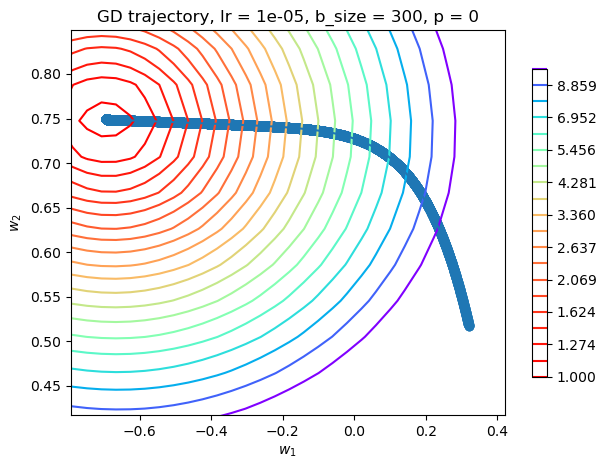

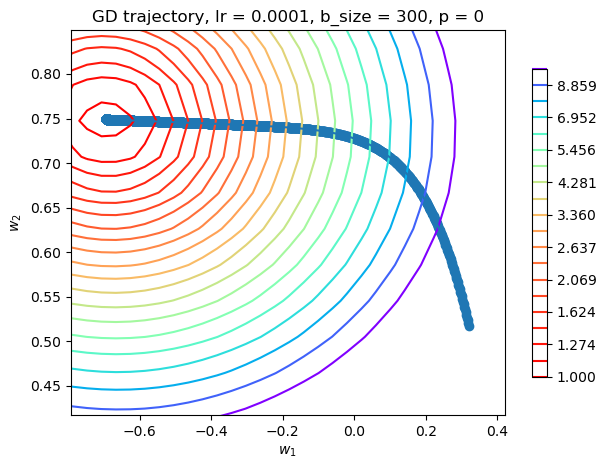

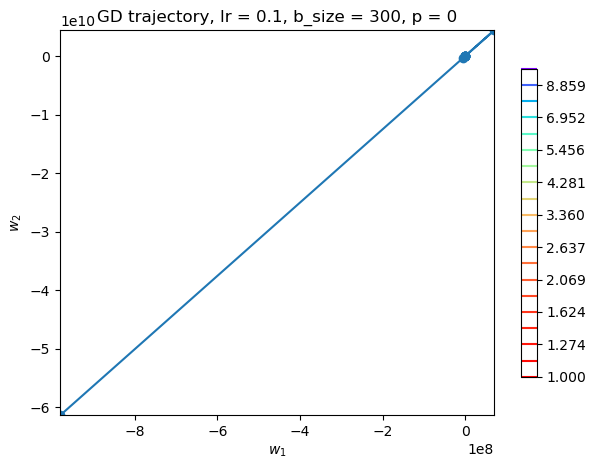

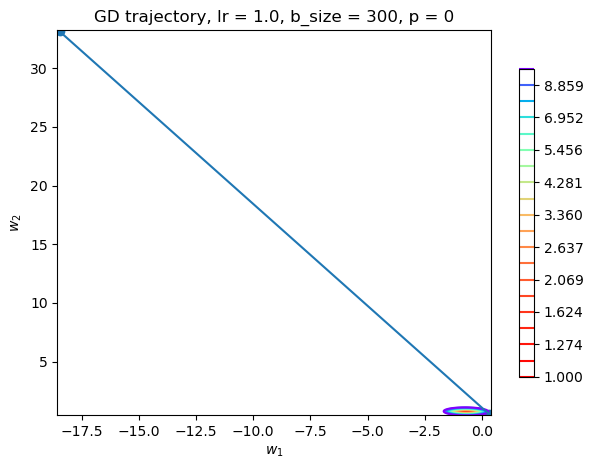

In [10]:
for i in geomspace(0.00001, 1, num=6):
    w_list = gradient_descent(w_init, X, y, loss, i, int(1/i))
    plot_gd(w_list, X, y, loss, round(i, 5), X.shape[0], 0)

Для $lr > 0.01$ картина не ясна, посмотрим с меньшим шагом.

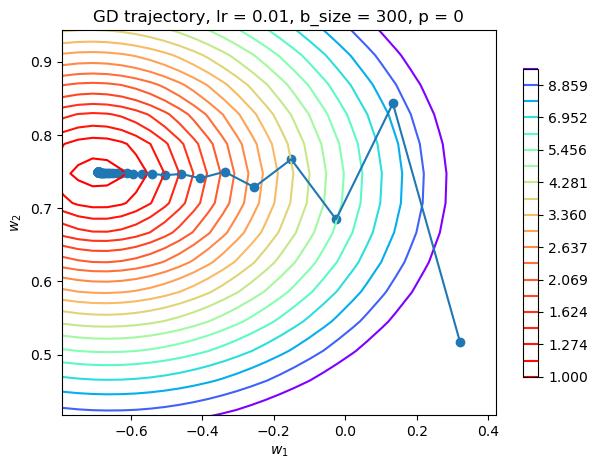

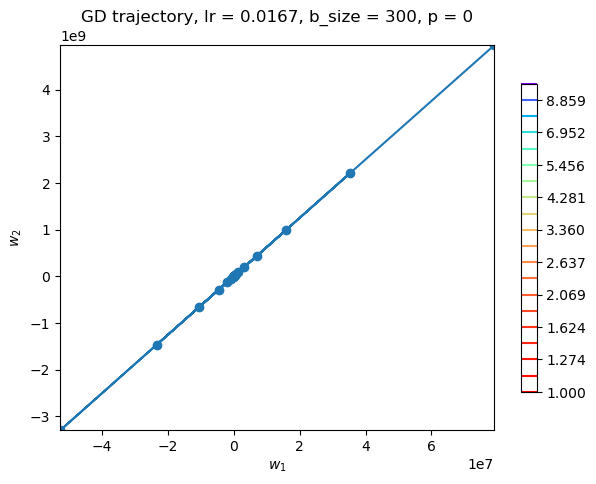

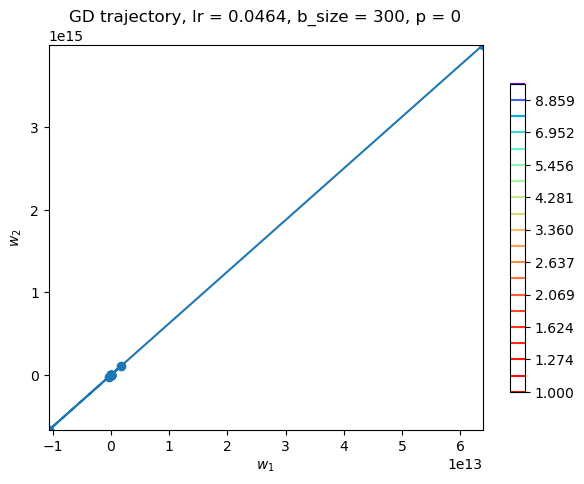

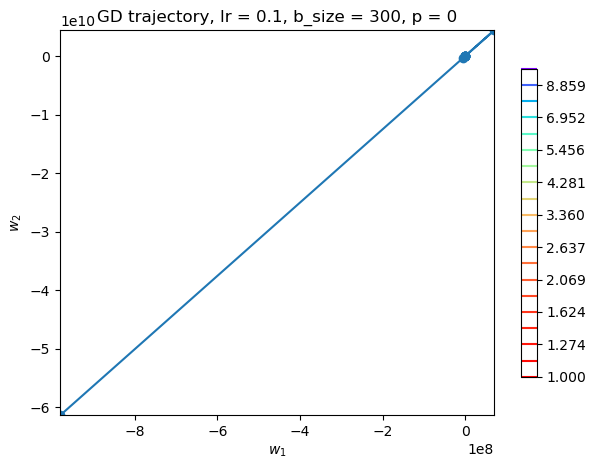

In [11]:
for i in geomspace(0.01, 0.1, num=10):
    w_list = gradient_descent(w_init, X, y, loss, i, int(1/i))
    plot_gd(w_list, X, y, loss, round(i, 4), X.shape[0], 0)

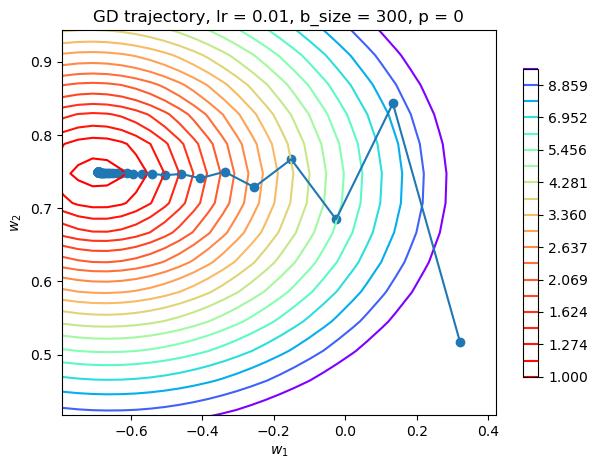

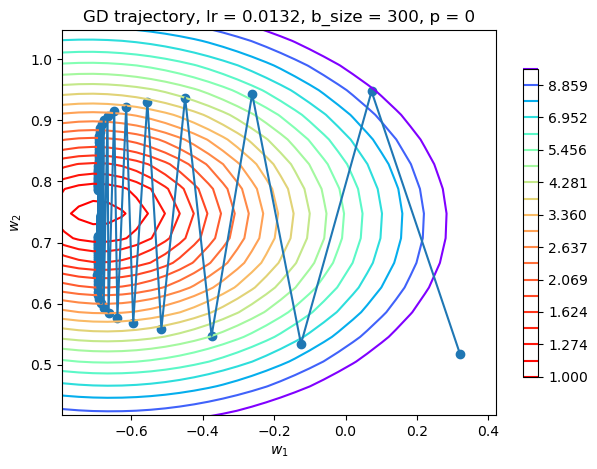

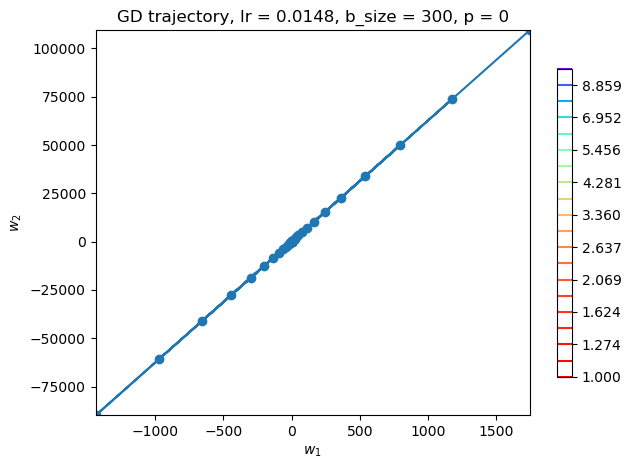

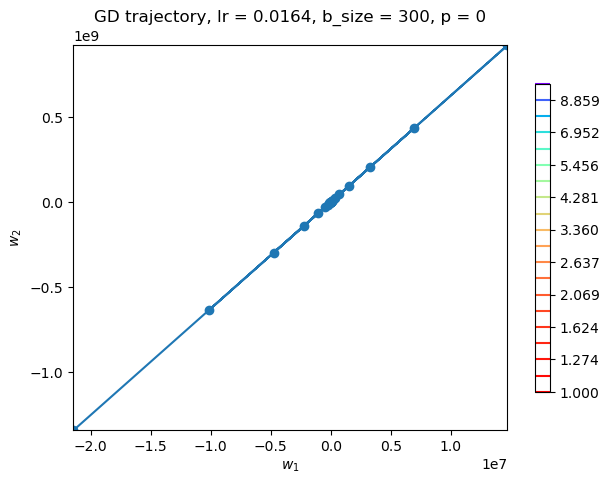

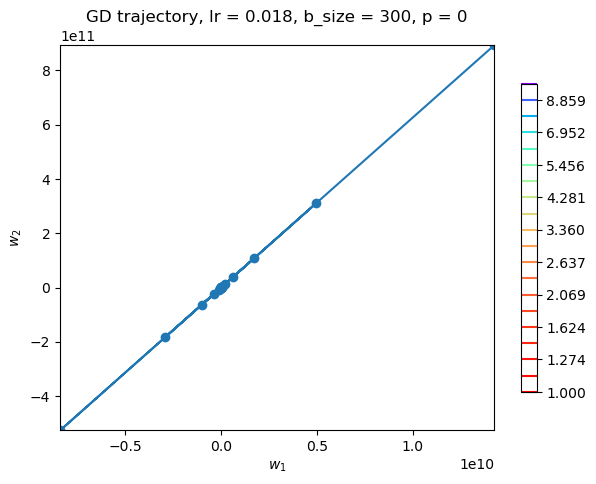

In [12]:
for i in linspace(0.01, 0.018, 6):
    w_list = gradient_descent(w_init, X, y, loss, i, int(1/i))
    plot_gd(w_list, X, y, loss, round(i, 4), X.shape[0], 0)

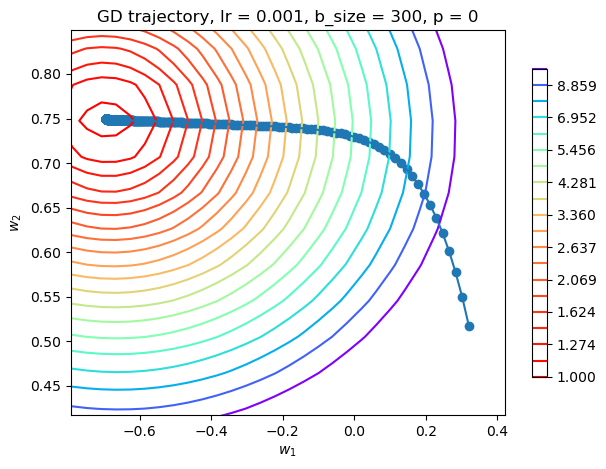

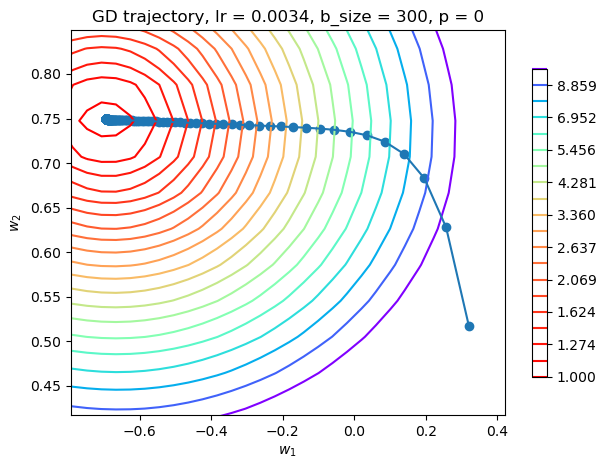

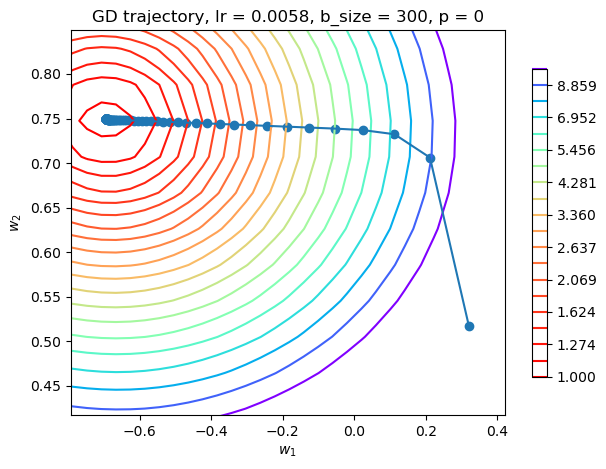

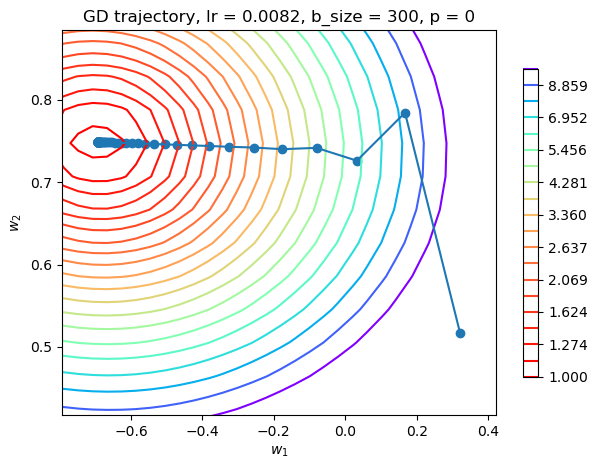

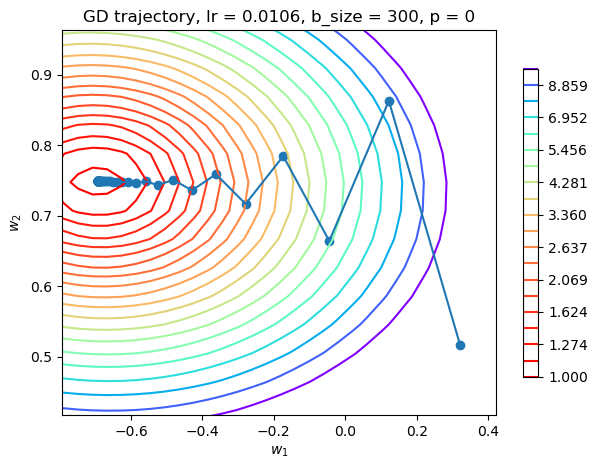

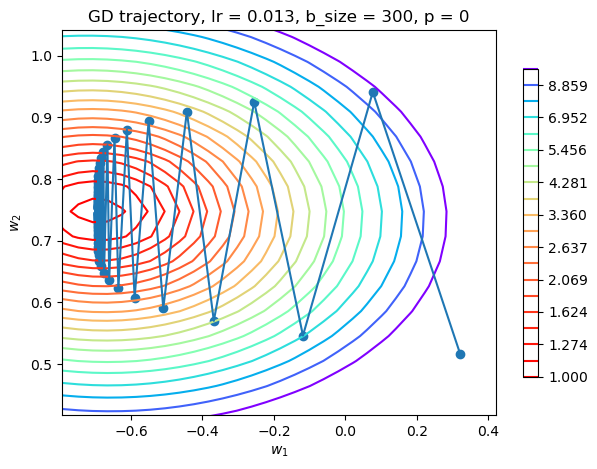

In [13]:
for i in linspace(0.001, 0.013, 6):
    w_list = gradient_descent(w_init, X, y, loss, i, int(1/i))
    plot_gd(w_list, X, y, loss, round(i, 4), X.shape[0], 0)

Как мы убедились на графиках, для $lr >= 0.148$ градиентный спуск работает плохо т.к, вместо того, чтобы сходиться, происходит наоборот расхождение, ответ мы получим неверный. В то же время для $0.1 < lr <= 0.132$ градиентный спуск по итогу приходит в нужную точку, но с увеличением $lr$ приближение к минимуму за каждый шаг уменьшается (что как раз при слишком большом $lr$ приводит к расхождению).

Фактически все значения $lr <= 0.001$ показывают одно и то же, с уменьшением $lr$ лишь уменьшается расстояние между точками, которое уже не влияет на внешний вид графика.

Посмотрев на графики лучшего диапозона для $lr$ можно сказать, что лучше всего себя показывает $lr = 0.0058$, т.к он совмещает в себе наиболее важные параметры, такие как оптимальная траектория движения к минимуму и минимум шагов.

Проанализировав все $lr$, можно сделать вывод, что не следует брать слишком большие значения, так как они либо вовсе не приводят к правильному ответу, либо делают это далеко не оптимально, хоть и за небольшое число операций, а слишком маленькие значения никак не улучшают работу самого градиентного спуска, но кратно увеличивают количество операций, что увеличивает время работы и тд.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [14]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    np.random.seed(13)
    w = w_init.copy()
    l = [w]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w = w - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w)
        l.append(w)
    return l

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Пользуясь предыдущими выводами насчет $lr$, будет брать перебор по следующему диапазону $0.001 <= lr <= 0.01$.

In [15]:
def plot_gd_group(lr, batch_size):
    np.random.seed(13)
    n_features = 2
    n_objects = 300
    w_true = np.random.normal(size=(n_features,))

    X = np.random.uniform(-5, 5, (n_objects, n_features))
    X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
    y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
    w_init = np.random.uniform(-2, 2, (n_features))

    loss = MSELoss()
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    fig, ax = plt.subplots(len(lr), len(batch_size), figsize=(17, 17))

    #fig.set_title("GD trajectories")
    #plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    #plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    #plt.gca().set_aspect("equal")

    # visualize the level set

    # visualize trajectory
    for ind in np.transpose([np.tile(np.arange(0, len(lr)), len(batch_size)), np.repeat(np.arange(0, len(batch_size)), len(lr))]):
        w_list = np.array(stochastic_gradient_descent(w_init, X, y, loss, lr[ind[0]], int(batch_size[ind[1]]), int(1/lr[ind[0]])))

        ax[ind[0], ind[1]].set(title=f"lr={round(lr[ind[0]], 4)}, b_size={int(batch_size[ind[1]])}")
        ax[ind[0], ind[1]].set_xlim([w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1])
        ax[ind[0], ind[1]].set_ylim([w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1])
        ax[ind[0], ind[1]].contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)

        ax[ind[0], ind[1]].scatter(w_list[:, 0], w_list[:, 1])
        ax[ind[0], ind[1]].plot(w_list[:, 0], w_list[:, 1])

    plt.show()

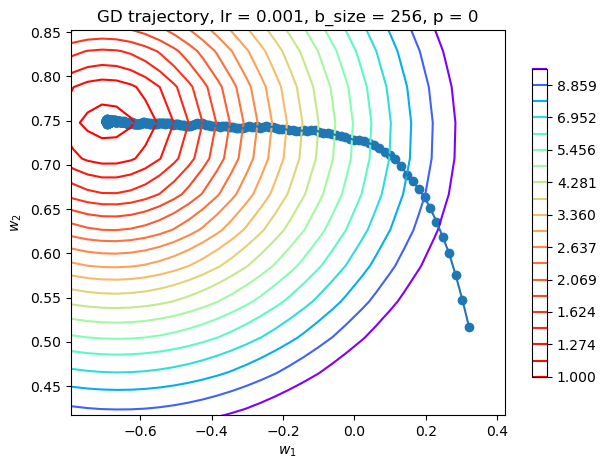

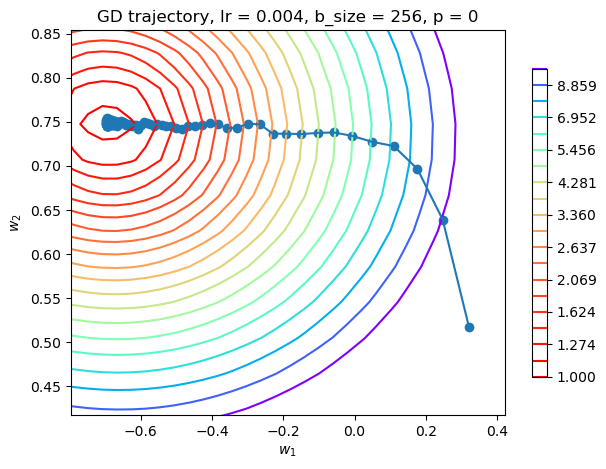

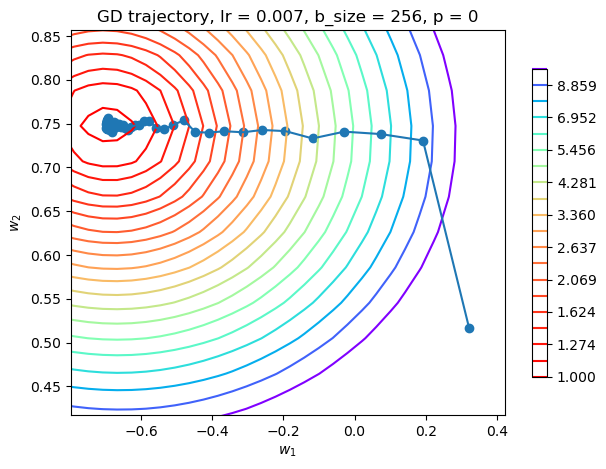

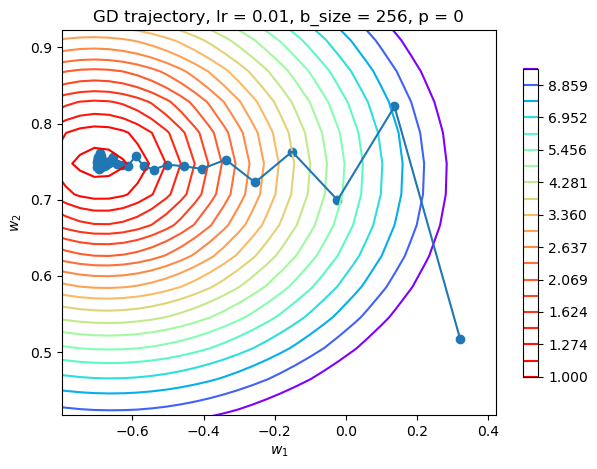

In [16]:
for i in linspace(0.001, 0.01, 4):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, i, 256, int(1/i))
    plot_gd(w_list, X, y, loss, round(i, 4), 256, 0)

Получается, что 'batch_size' может принимать значения от 1 до размера нашей выборки. Задача стохастического градиентного спуска облегчить наши вычисления не потеряв в качестве и результате. Как можно увидеть по графикам чем ближе 'batch_size' к размеру выборки, тем больше он сходится к обычному градиентному спуску, что логично.

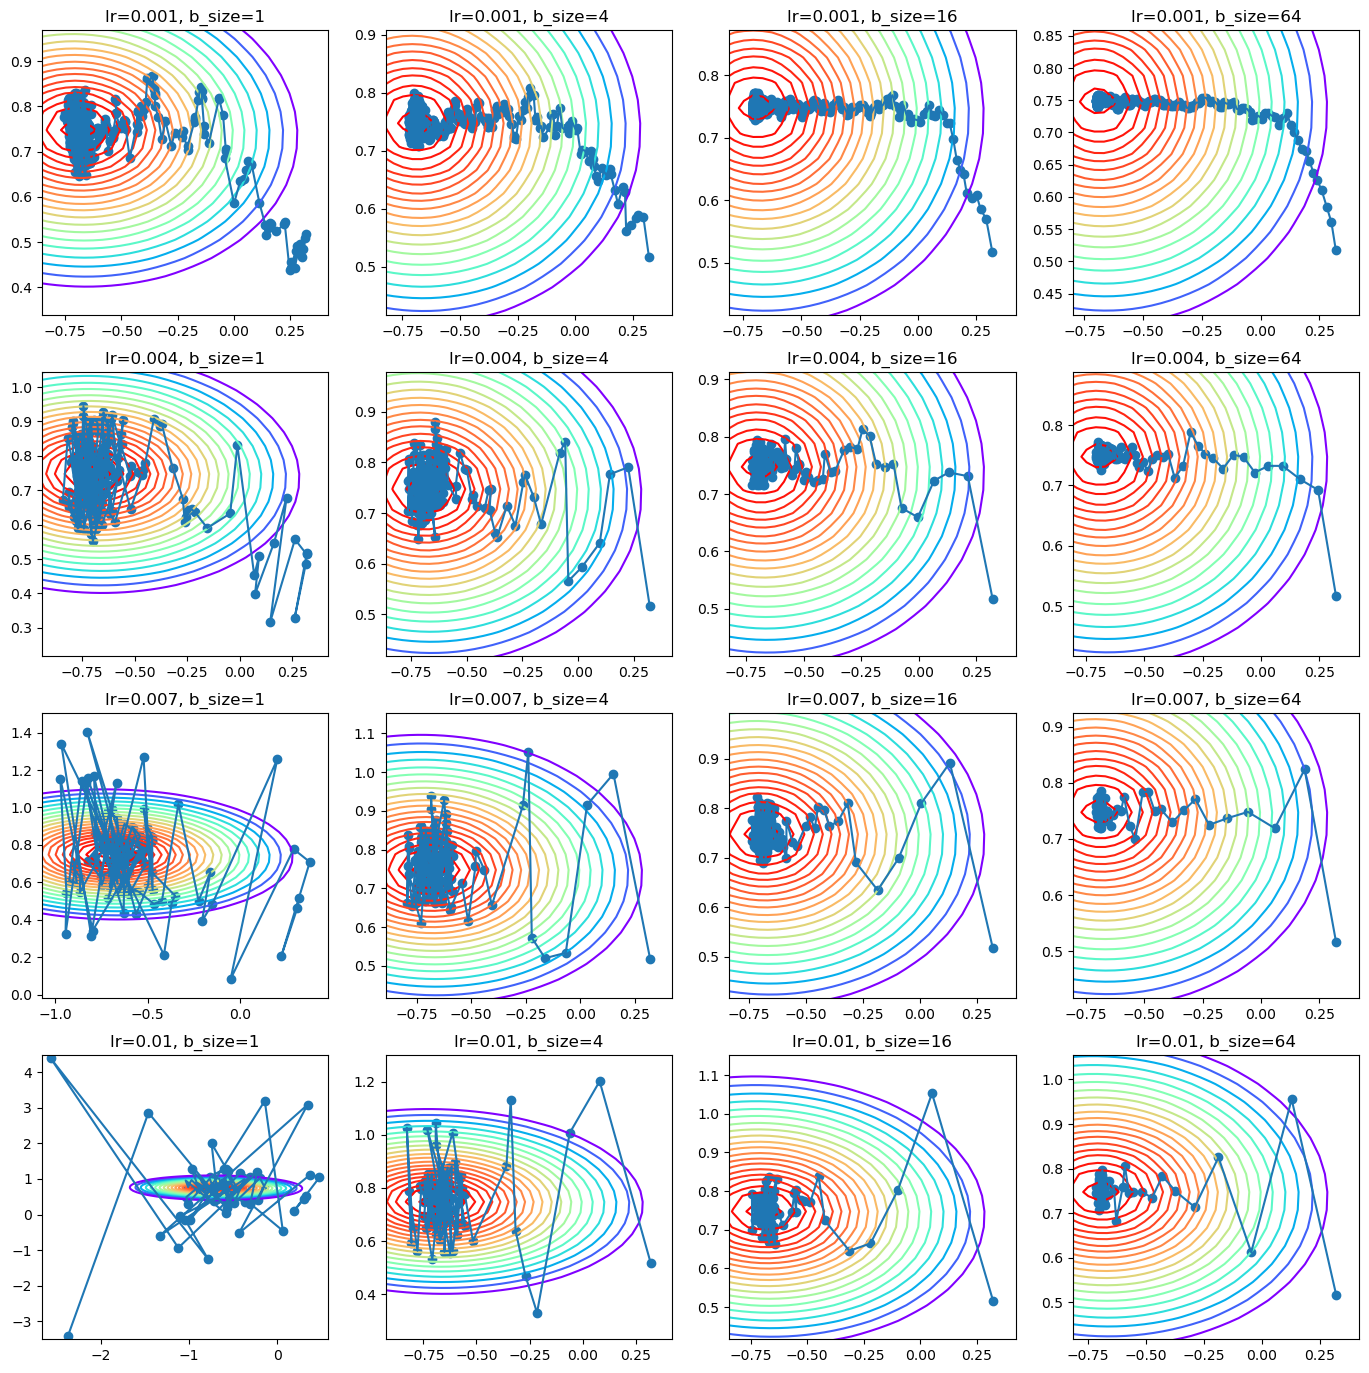

In [17]:
plot_gd_group(linspace(0.001, 0.01, 4), geomspace(1, 64, 4))

Получается, что данные параметры (`batch_size` и `lr`) работают вместе и подбирать их нужно вместе. Выше мы видим различные варианты сочетаний этих двух параметров. Сразу можно отметить, что при неизменном `lr` и увеличивающимся `batch_size` картина сглаживается и всё больше похоже на то, что градиентный спуск сойдется, а не будет ходить в окрестности. Хуже всего себя показывают градиентный спуск по одному объекту, ведь при низком показателе шага он еще кое-как сходиться, то при больших значениях результат не даст вовсе.

Если выбирать лучшие из предложенных, то я бы выбрал `batch_size` = от 16 до 64, которые могут сойтись и используют в разы меньше времени для подсчета одного шага, чем стандартный градиентный спуск.

В общем виде стохастический градиентный спуск отличается тем, что движение к минимуму идет неравномерно, с уменьшением `batch_size` увеличивается вероятность, что минимум не найдем вовсе.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [18]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    np.random.seed(13)
    w = w_init.copy()
    l = [w]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        nt = lr * (1/(1 + i)) ** p
        w = w - nt * loss.calc_grad(X[batch_indices], y[batch_indices], w)
        l.append(w)
    return l

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

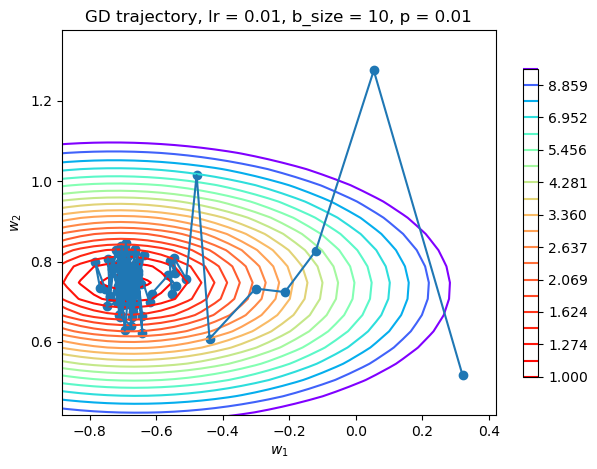

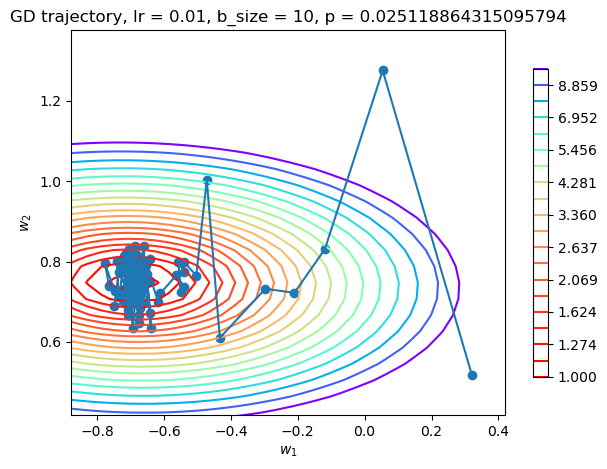

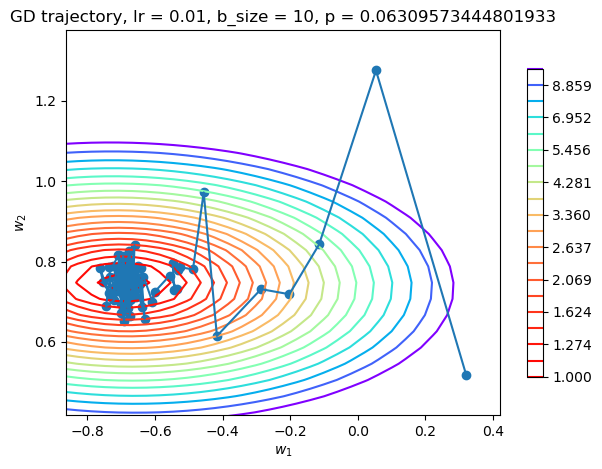

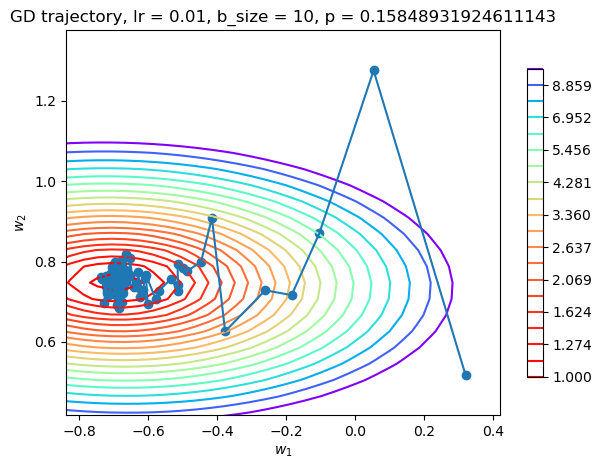

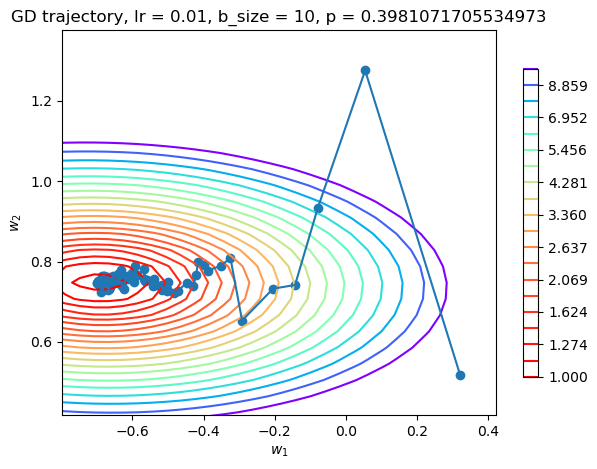

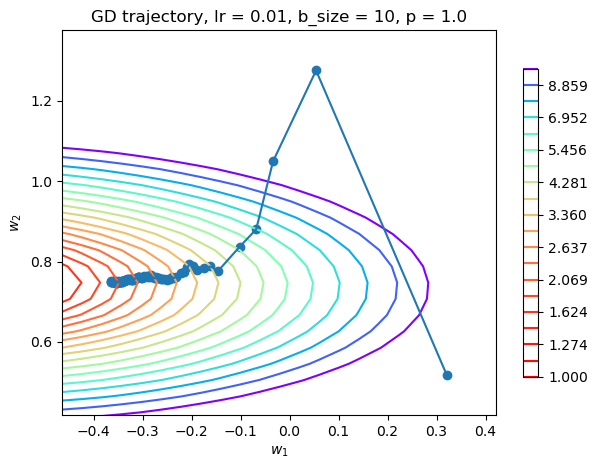

In [19]:
for p in geomspace(0.01, 1, 6):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    plot_gd(w_list, X, y, loss, 0.01, 10, p)

При маленьком $p$ шаг будет несильно отходить от $lr$, поэтому поведение стохастического градиентного спуска будет то же, как и при $p = 0$
При увеличении $p$ поведение стохастического градиентного спуска улучшается и он в итоге приводит в точку минимума или в ее окрестность.
Если же взять слишком большой $p >= 1$, то потребуется значимо больше операций, чтобы спуск дошел до минимума (хотя если операций будет достаточно, то спуск дойдет). Основная проблема именно в количестве шагов, потому что из-за экспоненциального уменьшения длины шага, количество требуемых шагов возрастает очень быстро.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [20]:
w_list_stand = gradient_descent(w_init, X, y, loss, 0.01, 100)
loss_stand = [loss.calc_loss(X, y, grad) for grad in w_list_stand]

w_list_stoch = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0, 100)
loss_stoch = [loss.calc_loss(X, y, grad) for grad in w_list_stoch]

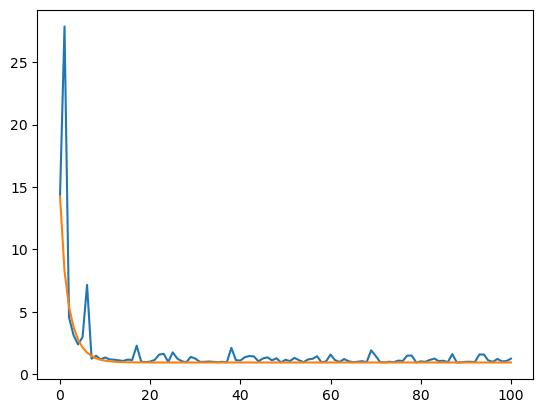

In [21]:
plt.plot(range(101), loss_stoch)
plt.plot(range(101), loss_stand)
plt.show()

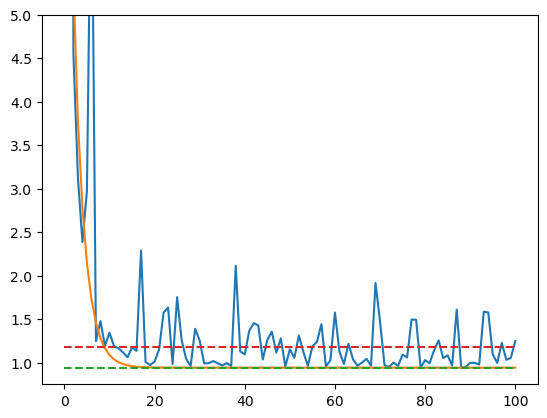

In [22]:
plt.ylim(0.75, 5)
plt.plot(range(101), loss_stoch)
plt.plot(range(101), loss_stand)
plt.plot(range(101), [loss_stand[-1]]*101, linestyle='--')
plt.plot(range(101), [np.mean(loss_stoch[10:])]*101, linestyle='--')
plt.show()

Что касается градиентного спуска без параметра $p$ (длина шага неизменная с количеством пройденных шагов).
Как видно по последнему (приближенному) графику, SGD продолжает скакать в небольшом диапазоне вплоть до 100 операции, что значит, что если мы останавливаем SGD в рандомный момент, то в среднем мы получаем значение, соответствующее красной линии, что отражает ошибку больше, чем у GD. В то же время, если правильно выбирать момент остановки (на это есть определенные алгоритмы), то SGD будет показывать ошибку схожую с GD, что отличный результат для относительно маленького `batch_size`, который тратит намного меньше времени на каждом шаге.

In [23]:
w_list_stoch = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.4, 100)
loss_stoch = [loss.calc_loss(X, y, grad) for grad in w_list_stoch]

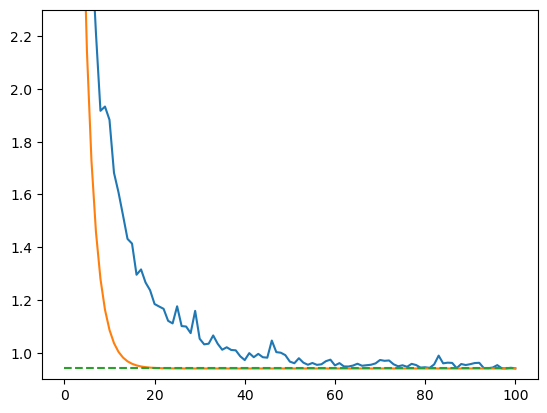

In [24]:
plt.ylim(0.9, 2.3)
plt.plot(range(101), loss_stoch)
plt.plot(range(101), loss_stand)
plt.plot(range(101), [loss_stand[-1]]*101, linestyle='--')
plt.show()

Если же рассматривать с наиболее оптимальным $p$, то графики будут выглядеть следующим образом.
Как видно, SGD медленнее приходит к показателям GD, но всё же до них доходит и без остаточных колебаний, которые позволяют остановить работу SGD в любой момент без особой потери качества.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [25]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        np.random.seed(13)
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, int(1/self.lr))[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return (X * self.w).sum(axis = 1)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [26]:
linear_regression = LinearRegression(MSELoss(), 0.0015)

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [27]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()


In [28]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [29]:
a = X_raw.isna().sum() / X_raw.shape[0]
a[a != 0]

1     0.18408
5     0.00995
18    0.01990
19    0.01990
21    0.00995
22    0.00995
dtype: float64

In [30]:
X_raw[1].mean()

122.0

In [31]:
X_raw[1].fillna(X_raw[1].mean(), inplace=True)
X_raw[5].fillna(X_raw[5].mode()[0], inplace=True)
X_raw[18].fillna(round(X_raw[18].mean(), 2), inplace=True)
X_raw[19].fillna(round(X_raw[19].mean(), 2), inplace=True)
X_raw[21].fillna(int(X_raw[21].mean()), inplace=True)
X_raw[22].fillna(X_raw[22].mode()[0], inplace=True)

In [32]:
X_raw.isna().sum().sum()

0

In [33]:
X_raw.drop('index', axis=1, inplace=True)
X_raw

0      1            2       3      4     5            6    7      8   \
0     3  122.0  alfa-romero     gas    std   two  convertible  rwd  front   
1     3  122.0  alfa-romero     gas    std   two  convertible  rwd  front   
2     1  122.0  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164.0         audi     gas    std  four        sedan  fwd  front   
4     2  164.0         audi     gas    std  four        sedan  4wd  front   
..   ..    ...          ...     ...    ...   ...          ...  ...    ...   
196  -1   95.0        volvo     gas    std  four        sedan  rwd  front   
197  -1   95.0        volvo     gas  turbo  four        sedan  rwd  front   
198  -1   95.0        volvo     gas    std  four        sedan  rwd  front   
199  -1   95.0        volvo  diesel  turbo  four        sedan  rwd  front   
200  -1   95.0        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...    15   16    17    18    19    20     21      22  23  24  
0     88.6  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
1     88.6  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
2     94.5  ...   six  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  
3     99.8  ...  four  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  
4     99.4  ...  five  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  
..     ...  ...   ...  ...   ...   ...   ...   ...    ...     ...  ..  ..  
196  109.1  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  
197  109.1  ...  four  141  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  
198  109.1  ...   six  173  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  
199  109.1  ...   six  145   idi  3.01  3.40  23.0  106.0  4800.0  26  27  
200  109.1  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  

[201 rows x 25 columns]

Несмотря на то, что некоторые признаки могут показаться численным, но мне кажется, что их нельзя сравнивать как числа (количество дверей, цилиндров).

In [34]:
i = [2, 3, 4, 5, 6, 7, 8, 14, 15, 17]
X = X_raw
for ind in i:
    s = pd.get_dummies(pd.Series(X_raw[ind]))
    X = X.join(s, lsuffix='_5', rsuffix='_15')

In [35]:
X.drop(columns=[2, 3, 4, 5, 6, 7, 8, 14, 15, 17], inplace=True)
X

0      1      9     10    11    12    13   16    18    19  ...  twelve  \
0    3  122.0   88.6  168.8  64.1  48.8  2548  130  3.47  2.68  ...       0   
1    3  122.0   88.6  168.8  64.1  48.8  2548  130  3.47  2.68  ...       0   
2    1  122.0   94.5  171.2  65.5  52.4  2823  152  2.68  3.47  ...       0   
3    2  164.0   99.8  176.6  66.2  54.3  2337  109  3.19  3.40  ...       0   
4    2  164.0   99.4  176.6  66.4  54.3  2824  136  3.19  3.40  ...       0   
..  ..    ...    ...    ...   ...   ...   ...  ...   ...   ...  ...     ...   
196 -1   95.0  109.1  188.8  68.9  55.5  2952  141  3.78  3.15  ...       0   
197 -1   95.0  109.1  188.8  68.8  55.5  3049  141  3.78  3.15  ...       0   
198 -1   95.0  109.1  188.8  68.9  55.5  3012  173  3.58  2.87  ...       0   
199 -1   95.0  109.1  188.8  68.9  55.5  3217  145  3.01  3.40  ...       0   
200 -1   95.0  109.1  188.8  68.9  55.5  3062  141  3.78  3.15  ...       0   

     two_15  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  
0         0     0     0     0    0    0     1     0     0  
1         0     0     0     0    0    0     1     0     0  
2         0     0     0     0    0    0     1     0     0  
3         0     0     0     0    0    0     1     0     0  
4         0     0     0     0    0    0     1     0     0  
..      ...   ...   ...   ...  ...  ...   ...   ...   ...  
196       0     0     0     0    0    0     1     0     0  
197       0     0     0     0    0    0     1     0     0  
198       0     0     0     0    0    0     1     0     0  
199       0     0     0     0    1    0     0     0     0  
200       0     0     0     0    0    0     1     0     0  

[201 rows x 74 columns]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values)
X_train = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [38]:
X_train

array([[ 0.13569144,  0.09075867, -0.41567725, ..., -0.84102145,
         4.35889894, -0.08481889],
       [-1.5162044 , -0.95717646,  2.01724605, ..., -0.84102145,
        -0.22941573, -0.08481889],
       [-0.69025648, -1.21916024, -0.38016012, ..., -0.84102145,
        -0.22941573, -0.08481889],
       ...,
       [ 0.96163937,  1.26968568, -0.87739992, ..., -0.84102145,
        -0.22941573, -0.08481889],
       [-1.5162044 , -1.05542038,  1.04052502, ...,  1.18903032,
        -0.22941573, -0.08481889],
       [ 0.13569144,  0.09075867, -0.41567725, ..., -0.84102145,
        -0.22941573, -0.08481889]])

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [39]:
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
y_pred

array([14553.98848434,  3939.49357626,  4544.85912537,  8507.8124415 ,
       14830.66810029, 15880.02418081, 25818.77862778, 15461.41019403,
        5108.13443934, 17118.0161609 , 17786.3208771 ,  3871.80893588,
       42432.09055109,  8623.03462956, 12074.31791375, 14097.84487276,
       15645.72077654,  7717.47574058, 14594.74355424,  8544.03466846,
       15122.05624084,  6942.49840307, 39128.07406988, 17028.03802755,
       31933.02554432, 16398.89732609, 30524.68416574,  7548.04342088,
        7642.82678259, 12286.58840949, 10862.97512007,  7179.00202948,
       16233.4435794 , 13137.61210147, 17690.65328256,  3707.40362859,
       23828.92541947,  8000.20154105, 26865.07217311, 13362.07244377,
        4893.1922872 , 13126.10352571,  4346.98416322,  3666.36390807,
        3434.26609451,  3647.21949274,  5472.84990574, 37934.13894283,
       10998.93765818,  9703.53564129, 21803.59805747, 13268.55467292,
        3538.54719884,  5702.30541503,  3979.55245599,  6804.37994484,
      

In [40]:
y_test.values

array([17199.,  7099.,  6229.,  9233., 18150., 12940., 28248., 17075.,
        7129., 16845., 18420.,  6855., 40960.,  8948.,  9639., 18150.,
       18399.,  7975., 13200.,  9995., 13415., 10198., 34184., 18920.,
       37028., 15998., 34028.,  8013.,  9895., 11199., 12629.,  9549.,
       19699., 12440., 16925.,  7799., 24565.,  6785., 41315., 15510.,
        8249., 15580.,  7499.,  6488.,  5572.,  7999.,  7788., 35056.,
       14869., 11694., 21105., 12170.,  5118.,  7395.,  6295.,  8949.,
        6529.,  6575.,  5151., 11248., 16515.])

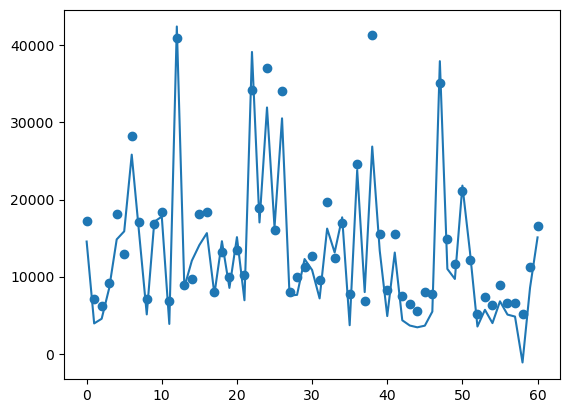

In [41]:
plt.plot(range(61), y_pred)
plt.scatter(range(61), y_test.values)
plt.show()

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

9847264.765244007

In [43]:
mean_squared_error(y_train, linear_regression.predict(X_train))

5313179.326037571

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [44]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return (((X * w).sum(axis=1) - y) ** 2).mean() + self.coef * (w[:-1] ** 2).sum()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (X.T * ((X * w).sum(axis=1) - y)).sum(axis=1) * 2/X.shape[0] + 2 * self.coef * (np.append(w[:-1], 0))
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [45]:
linear_regression = LinearRegression(MSEL2Loss(100), 0.0015)

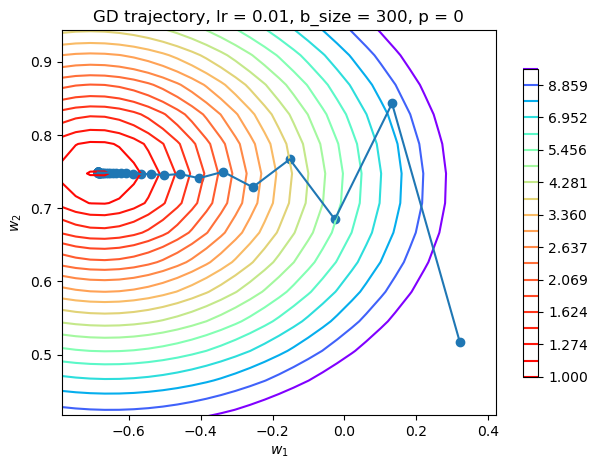

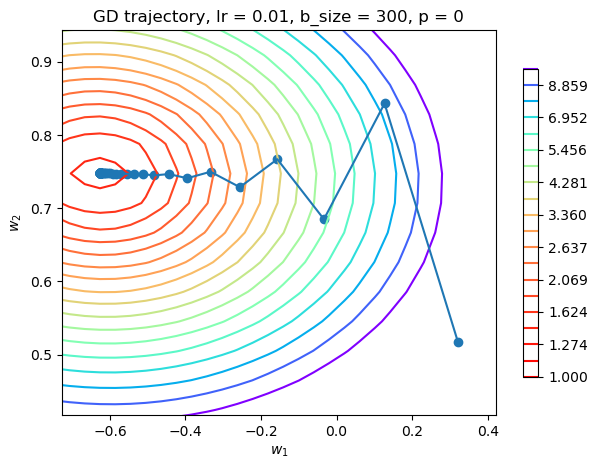

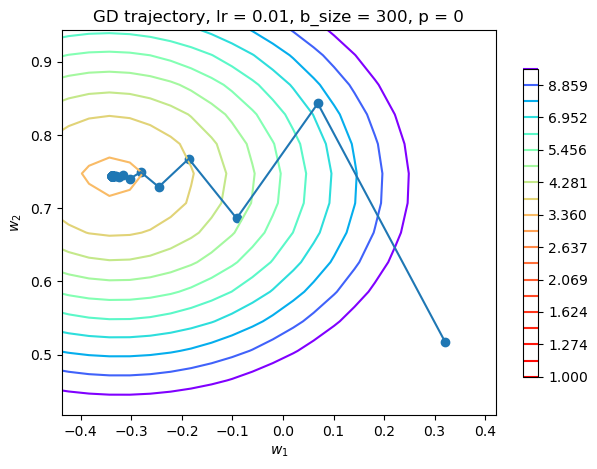

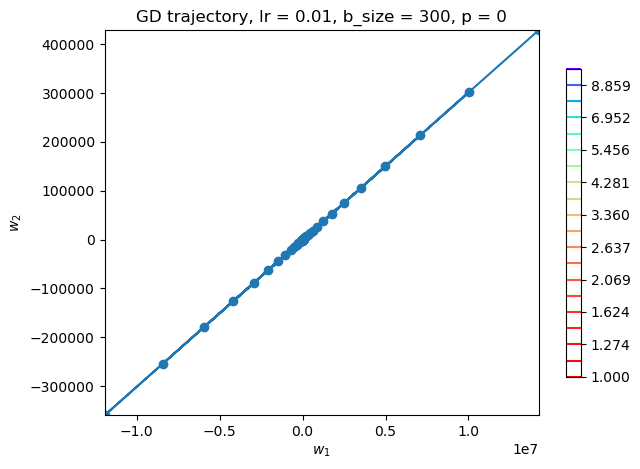

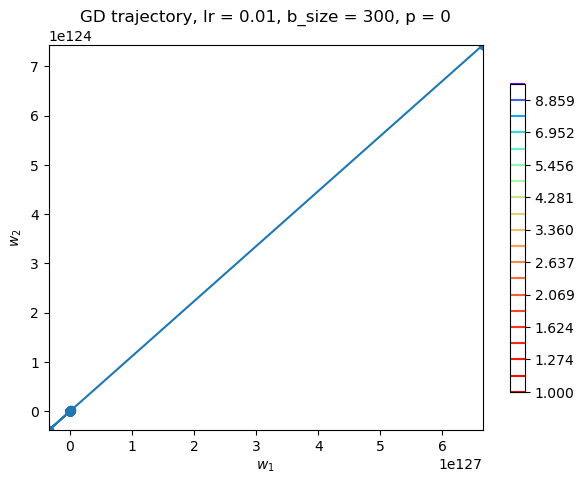

In [46]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(13)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

for i in geomspace(0.1, 1000, 5):
    loss = MSEL2Loss(i)
    w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
    plot_gd(w_list, X, y, loss, 0.01, X.shape[0], 0)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [47]:
linear_regression = LinearRegression(MSEL2Loss(1), 0.0015)
linear_regression.fit(X_train, y_train)
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

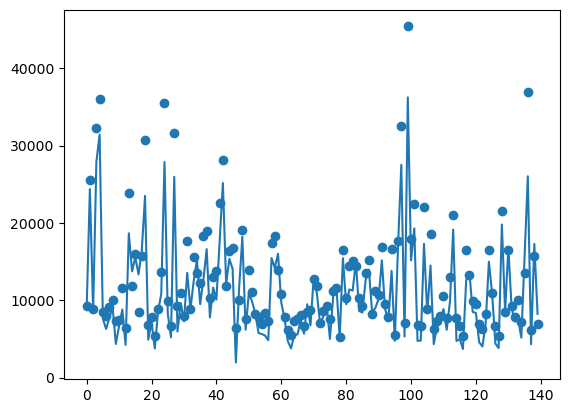

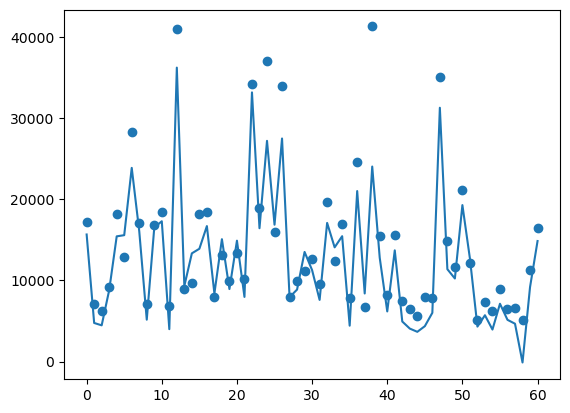

In [48]:
plt.plot(range(140), y_pred_train)
plt.scatter(range(140), y_train.values)
plt.show()
plt.plot(range(61), y_pred_test)
plt.scatter(range(61), y_test.values)
plt.show()

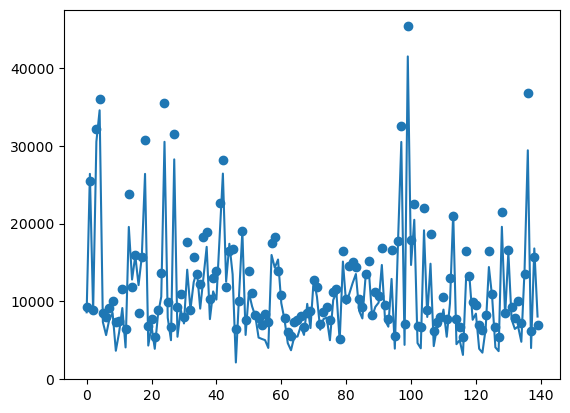

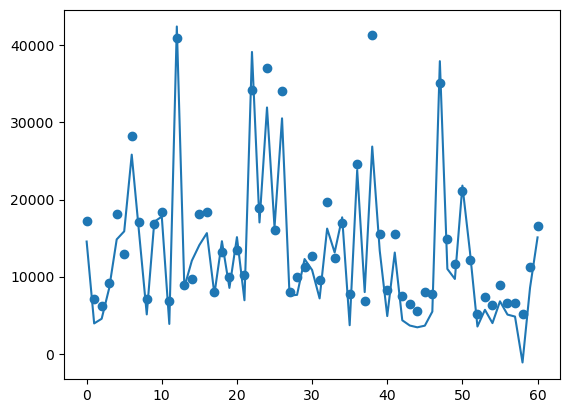

In [49]:
linear_regression = LinearRegression(MSEL2Loss(0), 0.0015)
linear_regression.fit(X_train, y_train)
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)
plt.plot(range(140), y_pred_train)
plt.scatter(range(140), y_train.values)
plt.show()
plt.plot(range(61), y_pred_test)
plt.scatter(range(61), y_test.values)
plt.show()

In [50]:
linear_regression_reg = LinearRegression(MSEL2Loss(0.1), 0.0015)
linear_regression_reg.fit(X_train, y_train)
linear_regression_no_reg = LinearRegression(MSEL2Loss(0), 0.0015)
linear_regression_no_reg.fit(X_train, y_train)
print('reg:', mean_squared_error(y_test, linear_regression_reg.predict(X_test)), ', no reg:', mean_squared_error(y_test, linear_regression_no_reg.predict(X_test)))
print('reg:', mean_squared_error(y_train, linear_regression_reg.predict(X_train)), ', no reg:', mean_squared_error(y_train, linear_regression_no_reg.predict(X_train)))

reg: 9810885.25286778 , no reg: 9847264.765244007
reg: 5455025.839801788 , no reg: 5313179.326037571


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [51]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def fi(self, z):
        if abs(z) < self.eps:
            return z ** 2 / 2
        else:
            return self.eps * (abs(z) - self.eps / 2)

    def grad_fi(self, z):
        if abs(z) < self.eps:
            return z
        else:
            return self.eps * z/abs(z)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray):# -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = (X * w).sum(axis=1) - y
        fun = np.vectorize(self.fi)
        z = fun(z)
        return z.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = (X * w).sum(axis=1) - y
        fun = np.vectorize(self.grad_fi)
        z = fun(z)
        return (X.T * z).mean(axis=1)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [52]:
def sign(a):
    return a/abs(a)


X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3])
loss = HuberLoss(4)
loss.calc_loss(X, y, w_init)

0.6834147915753004

In [53]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression

huber = HuberRegressor(epsilon = 10).fit(X_train, y_train)
mean_squared_error(y_test, huber.predict(X_test))

/Users/nikitaevseev/anaconda3/envs/Downloads/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


9635318.18087047

In [54]:
linear_regression_hub = LinearRegression(HuberLoss(10), 0.0056)
linear_regression_hub.fit(X_train, y_train)
linear_regression_no_reg = LinearRegression(MSEL2Loss(0), 0.0056)
linear_regression_no_reg.fit(X_train, y_train)
print('reg:', mean_squared_error(y_test, linear_regression_hub.predict(X_test)), ', no reg:', mean_squared_error(y_test, linear_regression_no_reg.predict(X_test)))
print('reg:', mean_squared_error(y_train, linear_regression_hub.predict(X_train)), ', no reg:', mean_squared_error(y_train, linear_regression_no_reg.predict(X_train)))

reg: 290008783.13934183 , no reg: 9828458.253708351
reg: 213874452.83941993 , no reg: 5291019.31459736


In [55]:
linear_regression_hub = LinearRegression(HuberLoss(1.35), 1)
linear_regression_hub.fit(X_train, y_train)
mean_squared_error(y_test, linear_regression_hub.predict(X_test))

290257520.2403622

In [56]:
from sklearn.datasets import make_regression

In [57]:
rng = np.random.RandomState(0)
X, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(10, 20, 4)

In [58]:
linear_regression_hub = LinearRegression(HuberLoss(1.35))
linear_regression_hub.fit(X, y)
linear_regression_hub.w

array([ 1.59519096, -0.10393005,  1.20259279])

In [59]:
huber = HuberRegressor(alpha=0).fit(X, y)
(huber.coef_ * X).sum(axis = 1)

array([ 8.07440154e+02,  7.64224895e+02,  7.63684433e+02,  8.42412188e+02,
       -3.93286933e+00, -7.63616867e+00, -2.68514774e+01,  1.73126861e+01,
       -2.35771125e+01,  1.93634816e+00, -3.93556939e+01, -2.36602193e+01,
        1.67141368e+01, -6.56992233e+01,  6.13224955e+01, -7.56222859e+00,
       -7.18369946e+01, -3.02746760e+01, -4.74665223e-01,  2.81758890e+01,
        1.98164768e+01,  8.01225957e+01, -1.69971842e+01, -3.56767804e+01,
        4.76608674e+01, -3.39915062e+01, -1.45306624e+01, -3.69224151e+01,
        2.01168503e+01,  1.53917727e+01, -6.79999431e+01, -3.97437471e+01,
       -4.42400604e+00, -9.23331666e+00, -6.55003006e+01,  2.89567711e+00,
        3.94025347e+01,  3.39917540e+01, -2.26521480e+01,  1.08966562e+01,
        3.28372905e+01,  4.36923476e+00,  3.92949631e+01,  5.18356495e+00,
        4.96054803e+01, -5.64160203e+01, -5.74718388e+01, -2.58083106e+01,
       -2.54501510e+01, -6.26904880e+01,  3.98840547e+01,  3.07362045e+01,
        2.73683731e+00,  

In [60]:
linear_regression_hub.predict(X)

array([ 2.41265287e+01,  2.51641314e+01,  2.22020269e+01,  2.21687334e+01,
       -2.66058168e-01,  2.65866685e+00,  1.94790106e+00,  2.40394760e+00,
        2.51806798e+00,  1.65932676e+00,  2.10507519e+00,  2.27047490e-01,
       -1.95718517e-02, -2.32393552e-01,  4.08754070e+00,  4.74114851e-01,
       -2.28919369e+00, -6.11153307e-01,  2.50541101e+00, -1.05389664e+00,
        1.29789637e+00,  4.11618256e+00,  1.10175946e-01, -7.33409925e-03,
        1.28122708e+00, -5.82336171e-01, -2.50120045e-01,  1.26132921e+00,
        6.91676905e-01,  3.10167091e+00,  8.48818298e-02,  8.92740948e-01,
        1.11543916e+00, -1.38593299e+00, -7.85839844e-01,  3.45093615e+00,
       -8.70763706e-01,  1.43332901e+00,  4.35129323e-01,  9.95265490e-01,
        8.67569883e-01,  5.26935385e-01, -6.10124053e-02,  2.00227190e+00,
        3.16245709e-01,  8.06801904e-01,  8.83845256e-01,  1.75316625e+00,
       -1.26184750e+00, -3.22466885e-01,  2.88865825e+00,  4.32399794e-01,
       -5.18060192e-01,  

In [61]:
huber.predict(X)

array([806.72474483, 763.50948638, 762.96902364, 841.69677926,
        -4.6482784 ,  -8.35157774, -27.56688646,  16.597277  ,
       -24.29252158,   1.22093909, -40.07110299, -24.37562836,
        15.99872769, -66.41463232,  60.60708645,  -8.27763766,
       -72.55240368, -30.99008509,  -1.19007429,  27.46047994,
        19.10106774,  79.40718665, -17.7125933 , -36.39218951,
        46.9454583 , -34.7069153 , -15.24607149, -37.63782416,
        19.40144123,  14.67636362, -68.71535217, -40.45915615,
        -5.13941512,  -9.94872573, -66.2157097 ,   2.18026804,
        38.6871256 ,  33.27634492, -23.36755704,  10.18124711,
        32.12188147,   3.65382569,  38.57955401,   4.46815588,
        48.89007123, -57.13142936, -58.18724787, -26.52371964,
       -26.16556007, -63.40589705,  39.16864568,  30.02079543,
         2.02142824,  30.24920188,   1.10702083,  38.55287896,
         7.40106581, -30.23381001, -12.31419722, -16.35188998,
       -81.11544016,   6.52193849, -41.34879896,  84.55

In [62]:
rng = np.random.RandomState(0)
X, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(10, 20, 4)
lin = LinearRegression(MSELoss(), 0.01)
lin.fit(X, y)
lin.w

array([-1.17952203,  6.3247366 , -2.56383845])

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

мем со скалой, который рассказывает

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [209]:
import random
import math

In [245]:
def fire(w: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss = MSELoss(), alpha: float = 0.95, k_res: float = 0.0001, freedom: int = 3):
    w_old = w
    res = [w_old]
    k = 1
    iter = 0
    while k > k_res:
        iter += 1
        w_new = w_old + np.random.standard_t(freedom, size=len(w_old))
        diff_loss = loss.calc_loss(X, y, w_old) - loss.calc_loss(X, y, w_new)
        if diff_loss <= 0:
            random.seed(iter)
            if random.uniform(0, 1) < math.exp(diff_loss/k):
                w_old = w_new
        else:
            w_old = w_new
        res.append(w_old)
        k *= alpha

    return res

In [246]:
class LinRegFire:
    def __init__(self, loss: BaseLoss = MSELoss(), freedom: int = 3, alpha: float = 0.95, k_res: float = 0.0001) -> None:
        self.loss = loss
        self.freedom = freedom
        self.alpha = alpha
        self.k_res = k_res

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinRegFire":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        np.random.seed(13)
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        self.w = fire(w_init, X, y, self.loss, self.alpha, self.k_res, self.freedom)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "LinRegFire must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return (X * self.w).sum(axis = 1)

In [247]:
lin_reg_fire = LinRegFire(MSELoss(), 10, 0.99, 0.1)
lin_reg_fire.fit(X_train, y_train)
mean_squared_error(y_test, lin_reg_fire.predict(X_test))

281481985.4399139

In [ ]:
np.random.seed(13)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)
loss = MSELoss()

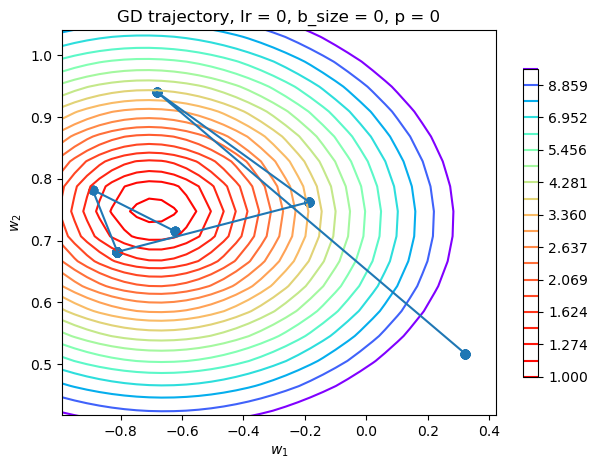

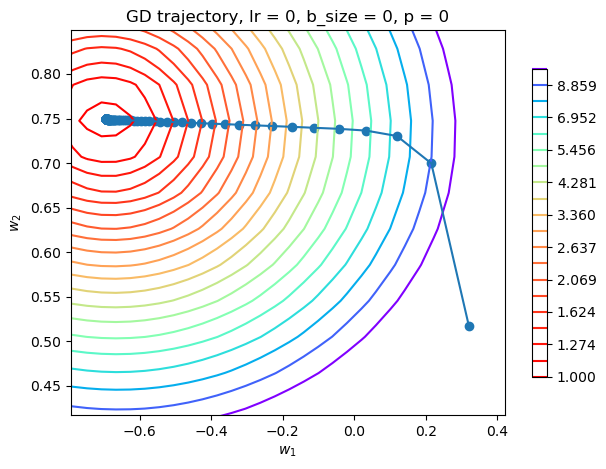

In [256]:
w_list = fire(w_init, X, y, MSELoss(), 0.95, 0.000001, 10)
plot_gd(w_list, X, y, MSELoss(), 0, 0, 0)
w_list = gradient_descent(w_init, X, y, MSELoss(), 0.0056, 200)
plot_gd(w_list, X, y, MSELoss(), 0, 0, 0)

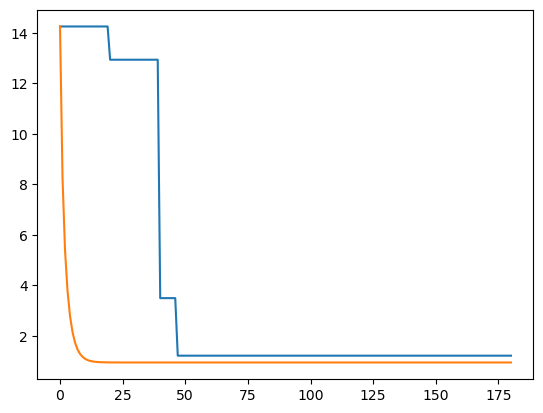

In [260]:
w_list_stand = gradient_descent(w_init, X, y, MSELoss(), 0.01, 180)
loss_stand = [loss.calc_loss(X, y, grad) for grad in w_list_stand]

w_list_fire = fire(w_init, X, y, MSELoss(), 0.95, 0.0001, 1)
loss_fire = [loss.calc_loss(X, y, grad) for grad in w_list_fire]
plt.plot(range(181), loss_fire)
plt.plot(range(181), loss_stand)
plt.show()

In [262]:
for freedom in geomspace(1, 32, 6):
    lin_reg_fire = LinRegFire(MSELoss(), freedom, 0.95, 0.00000001)
    lin_reg_fire.fit(X_train, y_train)
    print(mean_squared_error(y_test, lin_reg_fire.predict(X_test)))

159585071.58009157
261054736.28305307
273286552.88065064
275856711.30061185
277514713.1727987
277553685.7353084
